## Air Quality
dataset: https://www.kaggle.com/datasets/tfisthis/global-air-quality-and-respiratory-health-outcomes?resource=download

- Conociendo los datos

In [ ]:
# librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# dataset
dataset = pd.read_csv('air_quality_health_dataset.csv')
dataset.head() # viendo si se cargo de manera correcta los datos


,city,date,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity
0,Los Angeles,2020-01-01,65,34.0,52.7,2.2,38.5,33.5,33,5,Rural,1337
1,Beijing,2020-01-02,137,33.7,31.5,36.7,27.5,-1.6,32,4,Urban,1545
2,London,2020-01-03,266,43.0,59.6,30.4,57.3,36.4,25,10,Suburban,1539
3,Mexico City,2020-01-04,293,33.7,37.9,12.3,42.7,-1.0,67,10,Urban,552
4,Delhi,2020-01-05,493,50.3,34.8,31.2,35.6,33.5,72,9,Suburban,1631


In [ ]:
dataset.shape # tamaño del dataset

(88489, 12)

In [ ]:
dataset.info() # que tdatos tenemos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88489 entries, 0 to 88488
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 88489 non-null  object 
 1   date                 88489 non-null  object 
 2   aqi                  88489 non-null  int64  
 3   pm2_5                88489 non-null  float64
 4   pm10                 88489 non-null  float64
 5   no2                  88489 non-null  float64
 6   o3                   88489 non-null  float64
 7   temperature          88489 non-null  float64
 8   humidity             88489 non-null  int64  
 9   hospital_admissions  88489 non-null  int64  
 10  population_density   88489 non-null  object 
 11  hospital_capacity    88489 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 8.1+ MB


In [ ]:
#observar los valores unicos
def get_unique_values (df):
  output_data = []
  for col in df.columns:
    # si el numero de valores unicos es menor o igual a 10
    if df.loc[ :, col].nunique() <=10:
      # obtenemos los valores unicos en la columna
      unique_values = df.loc[ :,col].unique()
      # agregamos  el nombre de la columa, el numero de valores
      # unicos y los datos unicos.
      output_data.append([col, df.loc[ :, col].nunique(),
                          unique_values, df.loc[ :, col].dtype])
    else:
        # en cada caso contrario, agrega solamente el nombre de la
        # columna, el numero de valores unicos y el tipo de dato.
        output_data.append([col, df.loc[ :, col].nunique(),
                            "-",df.loc[:, col].dtype])
  output_df = pd.DataFrame(output_data, columns = ["columns name",
                                                    "Number of unique Values", "Unique values",
                                                    "Data type"])
  return output_df


get_unique_values(dataset)

,columns name,Number of unique Values,Unique values,Data type
0,city,8,"[Los Angeles, Beijing, London, Mexico City, De...",object
1,date,88489,-,object
2,aqi,500,-,int64
3,pm2_5,872,-,float64
4,pm10,1188,-,float64
5,no2,653,-,float64
6,o3,825,-,float64
7,temperature,451,-,float64
8,humidity,75,-,int64
9,hospital_admissions,26,-,int64


In [ ]:
dataset.describe().T # estadistica basica de los
# - count: Número de valores no nulos
# - mean: Promedio o media aritmética
# - std: Desviación estándar (medida de dispersión)
# - min: Valor mínimo
# - 25%: Primer cuartil (percentil 25)
# - 50%: Mediana (percentil 50)
# - 75%: Tercer cuartil (percentil 75)
# - max: Valor máximo

,count,mean,std,min,25%,50%,75%,max
aqi,88489.0,249.370182,144.479132,0.0,124.0,249.0,374.0,499.0
pm2_5,88489.0,35.144951,14.767994,0.0,24.9,35.1,45.2,109.9
pm10,88489.0,50.118654,19.796392,0.0,36.6,50.0,63.5,143.5
no2,88489.0,30.006211,9.963139,0.0,23.3,30.0,36.7,71.4
o3,88489.0,39.978895,12.007258,0.0,31.9,40.0,48.1,93.5
temperature,88489.0,17.522962,12.961024,-5.0,6.4,17.5,28.7,40.0
humidity,88489.0,56.950966,21.629675,20.0,38.0,57.0,76.0,94.0
hospital_admissions,88489.0,8.049385,3.715458,0.0,6.0,8.0,10.0,25.0
hospital_capacity,88489.0,1024.463165,561.978071,50.0,539.0,1026.0,1511.0,1999.0


- Legibilidad y Visualizacion de los datos

In [ ]:
# renombramiento a nombres en español y mas legibles
dataset.rename(columns={
    'city': 'Ciudad',
    'date': 'Fecha',
    'aqi': 'Calidad_Aire',
    'pm2_5': 'Concentracion_PM2.5',
    'pm10': 'Concentracion_PM10',
    'no2': 'Concentracion_Dioxido_Nitrogeno',
    'o3': 'Concentracion_Ozono',
    'temperature': 'Temperatura',
    'humidity': 'Humedad',
    'hospital_admissions': 'Hospitalizaciones',
    'population_density': 'Densidad_Poblacional',
    'hospital_capacity': 'Capacidad_Hospitalaria'
}, inplace=True)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88489 entries, 0 to 88488
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ciudad                           88489 non-null  object 
 1   Fecha                            88489 non-null  object 
 2   Calidad_Aire                     88489 non-null  int64  
 3   Concentracion_PM2.5              88489 non-null  float64
 4   Concentracion_PM10               88489 non-null  float64
 5   Concentracion_Dioxido_Nitrogeno  88489 non-null  float64
 6   Concentracion_Ozono              88489 non-null  float64
 7   Temperatura                      88489 non-null  float64
 8   Humedad                          88489 non-null  int64  
 9   Hospitalizaciones                88489 non-null  int64  
 10  Densidad_Poblacional             88489 non-null  object 
 11  Capacidad_Hospitalaria           88489 non-null  int64  
dtypes: float64(5), int

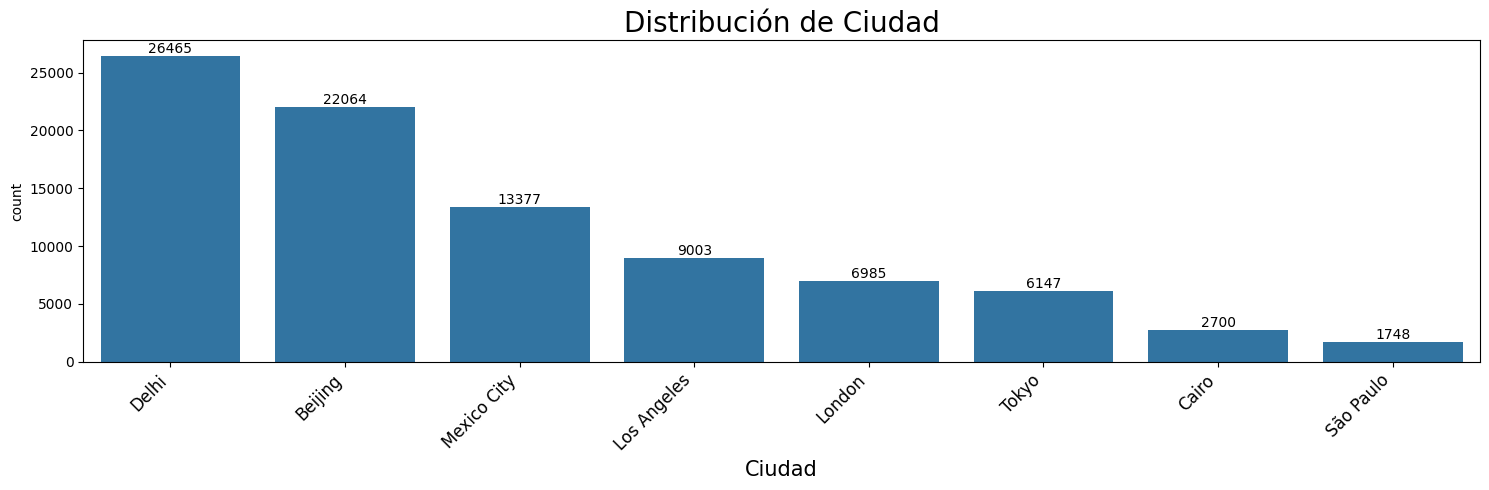

In [ ]:
# Corrige los nombres de las columnas en tu lista
columnas_dataset = [
    'Ciudad',
    'Fecha',
    'Calidad_Aire',
    'Concentracion_PM2.5',
    'Concentracion_PM10',
    'Concentracion_Dioxido_Nitrogeno',
    'Concentracion_Ozono',
    'Temperatura',
    'Humedad',
    'Hospitalizaciones',
    'Densidad_Poblacional',
    'Capacidad_Hospitalaria'
]

# Función mejorada para gráficas
def grafica_barras(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))

        # Para variables categóricas o discretas usa countplot
        if df[column].dtype == 'object' or df[column].nunique() < 20:
            ax = sns.countplot(x=column, data=df,
                             order=df[column].value_counts().index)
            ax.bar_label(ax.containers[0])
        else:
            # Para variables numéricas continuas usa histplot
            sns.histplot(data=df, x=column, kde=True)
            plt.ylabel('Frecuencia')

        plt.xlabel(column, fontsize=15)
        plt.title(f'Distribución de {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.tight_layout()
        plt.show()

# Ejecutar la función
grafica_barras(dataset, columnas_dataset)

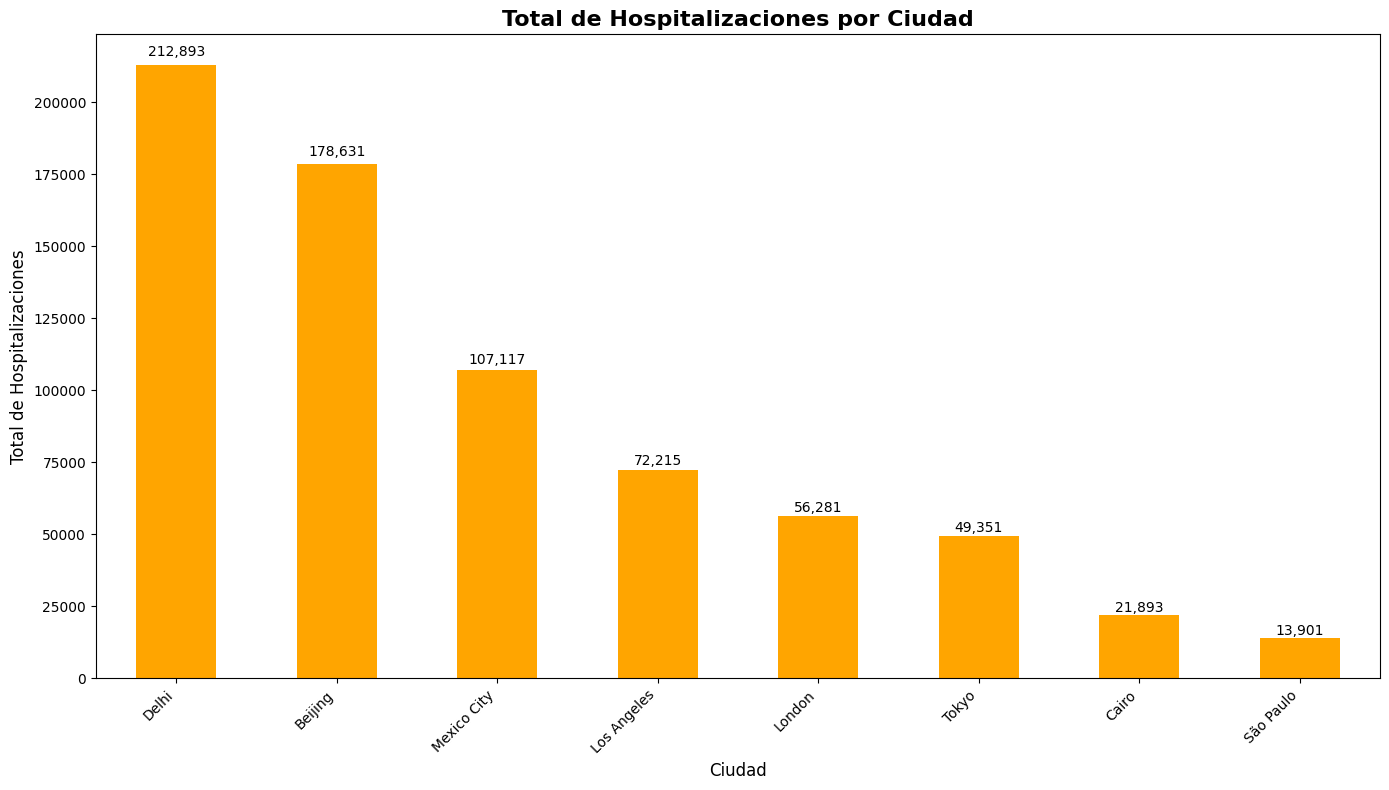

Top 15 Ciudades con más Hospitalizaciones:
Ciudad
Delhi          212893
Beijing        178631
Mexico City    107117
Los Angeles     72215
London          56281
Tokyo           49351
Cairo           21893
São Paulo       13901
Name: Hospitalizaciones, dtype: int64


In [ ]:
# Gráfica por Ciudad
plt.figure(figsize=(14, 8))

# Top 15 ciudades con más hospitalizaciones
hospitalizaciones_por_ciudad = dataset.groupby('Ciudad')['Hospitalizaciones'].sum().sort_values(ascending=False).head(15)

ax = hospitalizaciones_por_ciudad.plot(kind='bar', color='orange')
plt.title('Total de Hospitalizaciones por Ciudad', fontsize=16, fontweight='bold')
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Total de Hospitalizaciones', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Agregar valores en las barras
for i, v in enumerate(hospitalizaciones_por_ciudad):
    ax.text(i, v + (v * 0.01), f'{v:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("Top 15 Ciudades con más Hospitalizaciones:")
print(hospitalizaciones_por_ciudad)

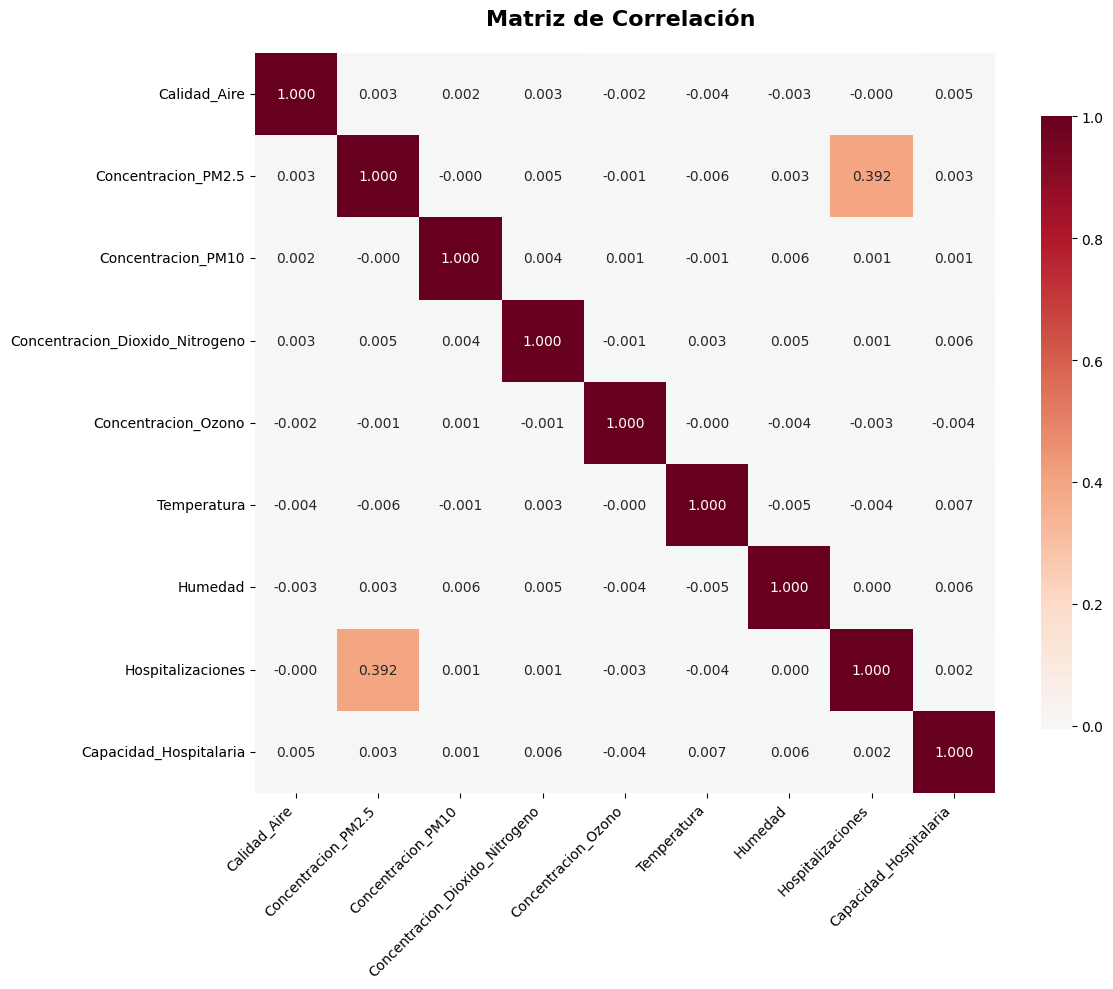

In [ ]:
# Seleccionar solo las columnas numéricas para la matriz de correlación
columnas_numericas = [
    'Calidad_Aire',
    'Concentracion_PM2.5',
    'Concentracion_PM10',
    'Concentracion_Dioxido_Nitrogeno',
    'Concentracion_Ozono',
    'Temperatura',
    'Humedad',
    'Hospitalizaciones',
    'Capacidad_Hospitalaria'
]

# Crear subdataset solo con columnas numéricas
dataset_numerico = dataset[columnas_numericas]

# Calcular matriz de correlación
matriz_correlacion = dataset_numerico.corr()

# Crear el heatmap COMPLETO (sin máscara)
plt.figure(figsize=(12, 10))

sns.heatmap(matriz_correlacion,
            annot=True,
            cmap='RdBu_r',
            center=0,
            fmt='.3f',  # Mostrar 3 decimales
            square=True,
            cbar_kws={'shrink': 0.8},
            annot_kws={'size': 10})

plt.title('Matriz de Correlación ',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88489 entries, 0 to 88488
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ciudad                           88489 non-null  object 
 1   Fecha                            88489 non-null  object 
 2   Calidad_Aire                     88489 non-null  int64  
 3   Concentracion_PM2.5              88489 non-null  float64
 4   Concentracion_PM10               88489 non-null  float64
 5   Concentracion_Dioxido_Nitrogeno  88489 non-null  float64
 6   Concentracion_Ozono              88489 non-null  float64
 7   Temperatura                      88489 non-null  float64
 8   Humedad                          88489 non-null  int64  
 9   Hospitalizaciones                88489 non-null  int64  
 10  Densidad_Poblacional             88489 non-null  object 
 11  Capacidad_Hospitalaria           88489 non-null  int64  
dtypes: float64(5), int

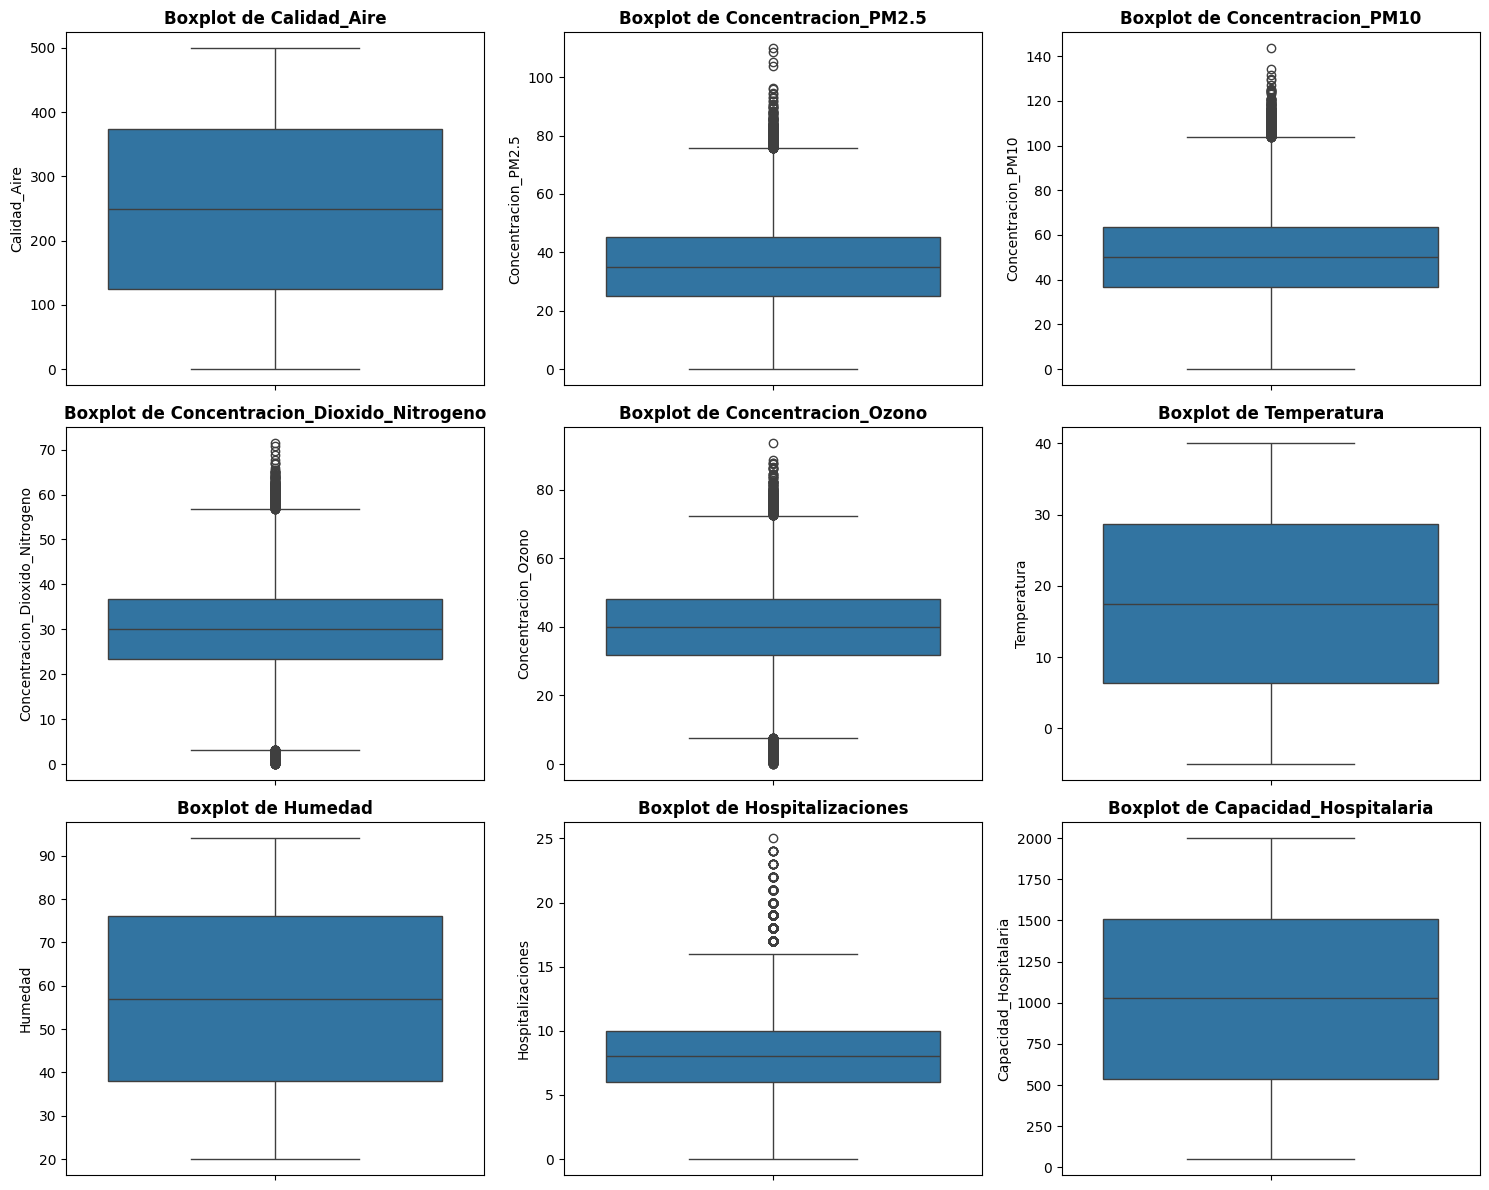

In [ ]:
dataset.info()

n_columnas = 3  # Puedes ajustar este número
n_filas = int(np.ceil(len(columnas_numericas) / n_columnas))

# Crear la figura
plt.figure(figsize=(5 * n_columnas, 4 * n_filas))

# Crear boxplot para cada columna
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(n_filas, n_columnas, i)
    sns.boxplot(y=dataset[col])
    plt.title(f'Boxplot de {col}', fontweight='bold')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Proyecto mineria - Prediccion

## Clasificasion de tipo de dia para gestionar recursos hospitalarios
### comparativa de random forest con regresion logistica
La demanda de servicios hospitalarios por enfermedades respiratoris esta estrechamente relacionada  con factores ambientales como la calidad del aire, la concentracion de contaminnates y las condiciones climaticas. En numerosos  estudios se ha desmotrado  que incrementos en particulas contaminantes com PM2.5, PM10 u ozono, asi como variaciones en la temperatura y humedad, pueden producir aumentos  significativos en las hospitalizaciones por afecciones respiratorias

En esta parte del proyecto tiene como objetivo desarrollar un modelos de Machine Learning capaz de clasificar  los dias en dos categorias de riesgo hospitalario (Normal y Alerta), utilizando variables atmosfericas, demograficas y el comportamiento historico de las hospitalizaciones

Para esto secontruye una etiqueta de riesgo que basada en la ocupacion hospitalaria real, la cual se usa depsues para entrenar un modelo supervisado que pueda predecir el nivel de riego  sin nececidad de concer el las hopitalizaciones futuras

El enfoque propuesto permite transformar los datos historicos en un sistema de apoyo a la toma de decisiones, capaz de anticipar escenarios de saturacion hospitalaria con base unica en las condiciones ambientales y contextuales del dia, Esto ayudaria en la posibilidad de asignar recursos medicos de manera preventiva, activar protocolos de contigencia y optimizar  la capacidad de optimizar la capacidad de atecion en situaciones criticas

- Desarrollo:
Para poder aplicar de manera correcta las tecnicas de machine learning orientadasa la clasificasion, fue necesario crear dos nuevas en base a otras variables del dataset (Ocupacion y Nmivel_Riesgo), estas columnas no existian en los datos, pero son fundamentales para tranformar la informacion cruda en un formato util para los modelos no supervisadas

Columna Ocupacion:
este fue echa en base a la siguiente formula para obtener la ocupacion historica de los dias, esto para tener una nocion de la ocupacion en ese dia en especial

        Ocupacion = Hospitalizaciones/Capacidad_Hospitalaria

este valor nos permite  convertir el numero absoluto de pacientes en un indicador normalizado, comparable entre distintos hospitales, de esta manera podemos dar un valor que represente la ocupacion de un hospital en un rango de 0 y 1


Columna Nivel_Riesgo:
esta variable se contruye a base de la columna ocupacion, aplicando reglas basadas en umbrales epidemiologicos donde los dias son categorizados de la siguiente manera:

        - Normal = Ocupacion < 20%
        - Alerta = Ocupacion >= 20%

In [ ]:
# creacion de la etiqueta
dataset["Ocupacion"] = dataset["Hospitalizaciones"] / dataset["Capacidad_Hospitalaria"]

def clasificar(x):
    if x < 0.20:
        return "Normal"
    elif x >= 0.20:
        return "Alerta"


dataset["Nivel_Riesgo"] = dataset["Ocupacion"].apply(clasificar)

dataset.head()

,Ciudad,Fecha,Calidad_Aire,Concentracion_PM2.5,Concentracion_PM10,Concentracion_Dioxido_Nitrogeno,Concentracion_Ozono,Temperatura,Humedad,Hospitalizaciones,Densidad_Poblacional,Capacidad_Hospitalaria,Ocupacion,Nivel_Riesgo
0,Los Angeles,2020-01-01,65,34.0,52.7,2.2,38.5,33.5,33,5,Rural,1337,0.003740,Normal
1,Beijing,2020-01-02,137,33.7,31.5,36.7,27.5,-1.6,32,4,Urban,1545,0.002589,Normal
2,London,2020-01-03,266,43.0,59.6,30.4,57.3,36.4,25,10,Suburban,1539,0.006498,Normal
3,Mexico City,2020-01-04,293,33.7,37.9,12.3,42.7,-1.0,67,10,Urban,552,0.018116,Normal
4,Delhi,2020-01-05,493,50.3,34.8,31.2,35.6,33.5,72,9,Suburban,1631,0.005518,Normal


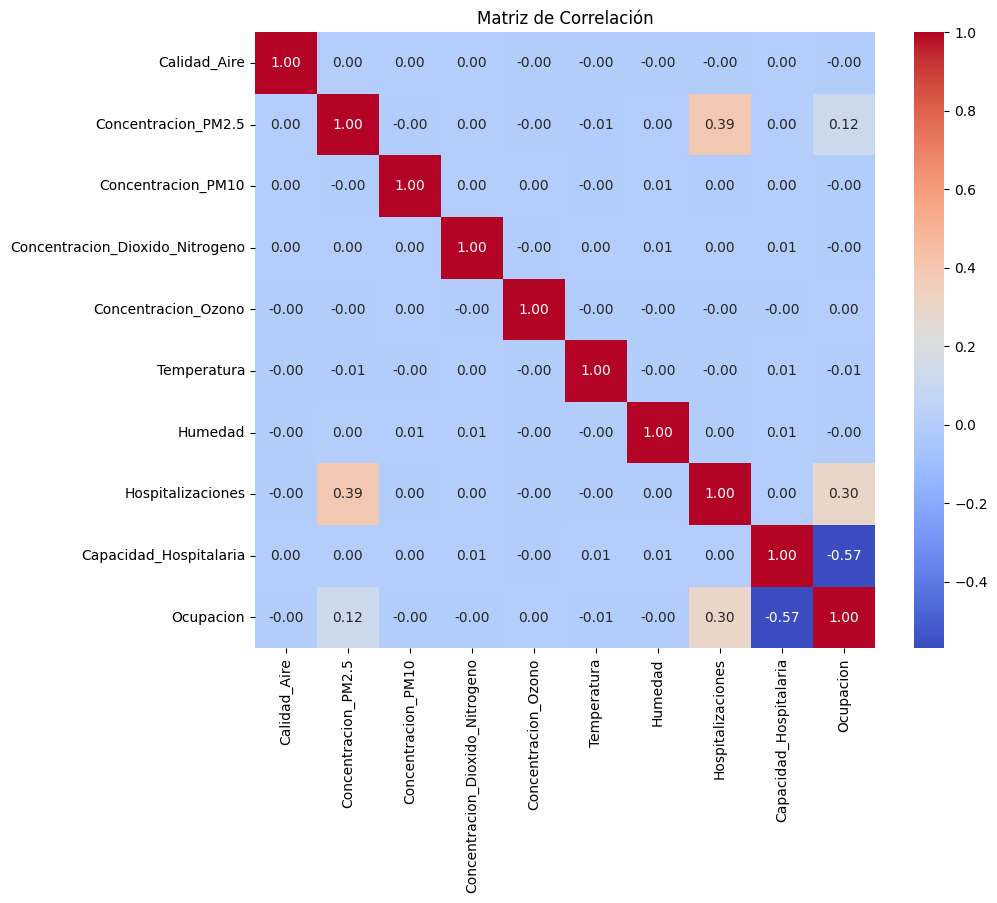

In [ ]:
# Seleccionar solo columnas numéricas
num_df = dataset.select_dtypes(include=["int64", "float64"])

# Matriz de correlación
corr = num_df.corr()

# Mostrar matriz
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [ ]:
# revisemos los valores unicos
get_unique_values(dataset)

,columns name,Number of unique Values,Unique values,Data type
0,Ciudad,8,"[Los Angeles, Beijing, London, Mexico City, De...",object
1,Fecha,88489,-,object
2,Calidad_Aire,500,-,int64
3,Concentracion_PM2.5,872,-,float64
4,Concentracion_PM10,1188,-,float64
5,Concentracion_Dioxido_Nitrogeno,653,-,float64
6,Concentracion_Ozono,825,-,float64
7,Temperatura,451,-,float64
8,Humedad,75,-,int64
9,Hospitalizaciones,26,-,int64


In [ ]:
# revisamos la cantidad de
counts = dataset["Nivel_Riesgo"].value_counts()
print(counts)


Nivel_Riesgo
Normal    88316
Alerta      173
Name: count, dtype: int64


Como podemos ver, la matriz de correlación no muestra grandes cambios. Sin embargo, sí aparecen dos variaciones importantes: un ligero incremento positivo en la relación entre Ocupación y Hospitalizaciones, y un incremento negativo en la relación entre Ocupación y Capacidad Hospitalaria. Esto se interpreta de la siguiente manera:

    - correlación positiva entre Ocupación y Hospitalizaciones es algo esperable ya que la ocupación depende directamente del número de personas hospitalizadas aun así el hecho de que no sea una correlación muy alta indica que la capacidad hospitalaria también influye bastante y atenúa ese efecto

    - correlación negativa moderada entre Ocupación y Capacidad Hospitalaria muestra que los hospitales con mayor capacidad tienden a tener porcentajes menores de ocupación esto ocurre porque la capacidad forma parte del cálculo de la variable (está en el denominador) pero también refleja que los hospitales más grandes suelen tener más margen antes de llegar a saturarse

Pero como podemos ver el dataset presentan un gran desbalance entre clases en casi un 99.8% donde la clase mas abundante es la de dia normal con 88316 registros, mientras que la clase de alerta apenas llega 173 registros, por lo que tendremos que balancear las clases para que el modelos pueda aprender de manera correcta


In [ ]:
# balanceo de la clases
# extraccion de las clases
normal = dataset[dataset["Nivel_Riesgo"] == "Normal"]
alerta = dataset[dataset["Nivel_Riesgo"] == "Alerta"]

# dataset balanceado con una reduccion de registros a la par de la clase alerta
normal_bal = normal.sample(n=len(alerta), random_state=42)

# mesclaren ambas clases en un pequeño dataset
dataset_balanced = pd.concat([normal_bal, alerta])

# mescla final del dataset
dataset_balanced = dataset_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# ver la cantidad de los datos
counts = dataset_balanced["Nivel_Riesgo"].value_counts()
print(counts)


Nivel_Riesgo
Normal    173
Alerta    173
Name: count, dtype: int64


In [ ]:
# revisar la integridad de los datos
dataset_balanced.head()

,Ciudad,Fecha,Calidad_Aire,Concentracion_PM2.5,Concentracion_PM10,Concentracion_Dioxido_Nitrogeno,Concentracion_Ozono,Temperatura,Humedad,Hospitalizaciones,Densidad_Poblacional,Capacidad_Hospitalaria,Ocupacion,Nivel_Riesgo
0,Los Angeles,2199-08-19,316,36.8,83.8,35.3,44.5,13.1,47,7,Urban,699,0.010014,Normal
1,Beijing,2021-05-08,88,18.9,28.9,44.5,50.0,-1.0,83,9,Rural,339,0.026549,Normal
2,Beijing,2161-09-07,182,56.4,43.5,35.8,42.0,31.6,82,15,Urban,58,0.258621,Alerta
3,Tokyo,2070-04-26,235,69.7,117.4,34.7,27.2,33.8,86,14,Suburban,53,0.264151,Alerta
4,London,2225-12-31,229,60.0,34.6,22.4,40.0,33.3,62,15,Urban,53,0.283019,Alerta


In [ ]:
dataset_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ciudad                           346 non-null    object 
 1   Fecha                            346 non-null    object 
 2   Calidad_Aire                     346 non-null    int64  
 3   Concentracion_PM2.5              346 non-null    float64
 4   Concentracion_PM10               346 non-null    float64
 5   Concentracion_Dioxido_Nitrogeno  346 non-null    float64
 6   Concentracion_Ozono              346 non-null    float64
 7   Temperatura                      346 non-null    float64
 8   Humedad                          346 non-null    int64  
 9   Hospitalizaciones                346 non-null    int64  
 10  Densidad_Poblacional             346 non-null    object 
 11  Capacidad_Hospitalaria           346 non-null    int64  
 12  Ocupacion             

## Implementacion de RandomForestClassifier
Aqui lo que haremos era implementar diferentes configuraciones del algoritmos de RadomForest con el objetivo de evaluar la capacidad de para clasificar los dias como Normal o Alerta en base a las variables atmosfericas
como bien sabemos RandomForest esta compuesto de de multiples arboles de decision construidos de manera aleatoria, la principal ventaja que tiene es que reduce la varianza  de arboles individuales y mejora la capacidad de generalizacion del modelo lo que lo hace util cuando la srelaciones de las variables son muy complejas o no lineales, lo ultimo que es nuestro caso lo podemos ver en las matrices de correlaccion, donde se aprecia que no tienen niguna relacion no linea ya que todos los indices de correlacion son muy bajos o iuncluso negativos

Dado a que el dataset es usado es pequeño y presenta patrones diciles de capaturar, se explora 3 variantes de RandomForest: Randomforest base, RandomForest profundo y RandomForest regularizado

cada variante de RandomForest entrena con los mismos porcentajes de informacion 80% train y 20% test asegurando que sea una evaluacion justa, esto para obtener metricas comparables en mismas condiciones como lo son precisión, recall, F1-score y área bajo la curva ROC

In [ ]:
X = dataset_balanced[['Concentracion_PM2.5','Concentracion_PM10','Concentracion_Dioxido_Nitrogeno',
             'Concentracion_Ozono','Temperatura','Humedad']]
y = dataset_balanced['Nivel_Riesgo']

# divicion del dataset en 80% train y 20% test
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels,
                linewidths=0.5, linecolor='gray')

    plt.title("Matriz de Confusión", fontsize=16)
    plt.xlabel("Predicción", fontsize=14)
    plt.ylabel("Real", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


Random Forest — Modelo 1
              precision    recall  f1-score   support

      Alerta       0.75      0.77      0.76        39
      Normal       0.70      0.68      0.69        31

    accuracy                           0.73        70
   macro avg       0.72      0.72      0.72        70
weighted avg       0.73      0.73      0.73        70

[[30  9]
 [10 21]]


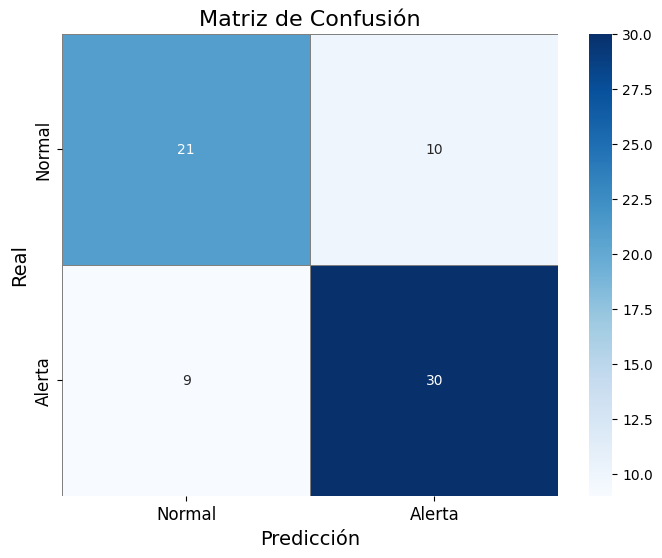

In [ ]:
# prueba 1
rf_1 = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_1.fit(X_train, y_train)
y_pred_rf_1 = rf_1.predict(X_test)

print("Random Forest — Modelo 1")
print(classification_report(y_test, y_pred_rf_1))
print(confusion_matrix(y_test, y_pred_rf_1))
plot_confusion_matrix(y_test, y_pred_rf_1, labels=["Normal", "Alerta"])



### iterpretacion de prueba 1: RandomForest base
para este caso se obtuvo un acurracy del 73%, lo que indica que que modelo es capas de clasificar correctamente aproximadamente 3 de cada cuanto instancias, lo que es un valor bueno para el tamaño reducido del dataset y muestra que si aprendio de los datos

en cuanto a desempeño individial podemos ver lo siguiente:

Clase "Alerta"
- prescision: 0.75 o en palabras mas claras que pudo clasificar el 75% de los casos presentados
- recall: 0.77 ose que tiene un 77% de poder clasificar objetos de esta clase
- F1-score: 0.76 esto lo que nos indica es que 76% de buen manejo de esta clase

Clase "Normal"
- prescision: 0.70 o en palabras mas claras que pudo clasificar el 70% de los casos presentados
- recall: 0.68 ose que tiene un 68% de poder clasificar objetos de esta clase
- F1-score: 0.69 esto lo que nos indica es que 69% de buen manejo de esta clase

En general podemos ver que hay un mejor redimiento al tratar de clasificar ambas clases, teniendo mejores resultado para la clase "Alerta", llevando un 5% de ventaja con respecto a la clase "Normal" lo que puede deberse a la distriuacion de los ejemplos o la facilidad de encontrar los patrones de ambas clases

que como podemos ver en la matriz de confusion se pue de ver lo siguiente:

Clase "Alerta"
- clasifico de manera correcta 21 intancias y clasfifico de manera erronea 10 instancias

Clase "Normal"
- clasifico de manera correcta 30 instancias y clasifico de manera erronea  9 instancias

Random Forest — Modelo 2 (Profundo)
              precision    recall  f1-score   support

      Alerta       0.71      0.69      0.70        39
      Normal       0.62      0.65      0.63        31

    accuracy                           0.67        70
   macro avg       0.67      0.67      0.67        70
weighted avg       0.67      0.67      0.67        70

[[27 12]
 [11 20]]


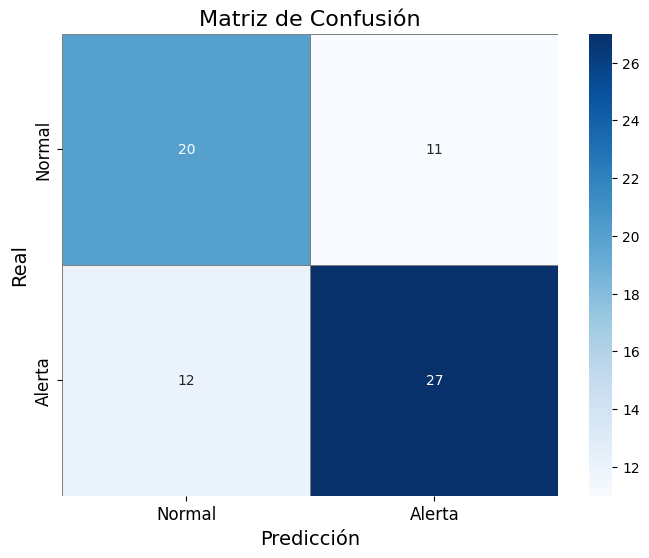

In [ ]:
# prueba 2
rf_2 = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    random_state=42
)

rf_2.fit(X_train, y_train)
y_pred_rf_2 = rf_2.predict(X_test)

print("Random Forest — Modelo 2 (Profundo)")
print(classification_report(y_test, y_pred_rf_2))
print(confusion_matrix(y_test, y_pred_rf_2))
plot_confusion_matrix(y_test, y_pred_rf_2, labels=["Normal", "Alerta"])


### interpretacion de prueba 2: RandomForest profundo
Este modelo corresponde la configuracion mas compleja de RandomForest, ayq ue este cuenta con una mayor cantidad de arboles y una mayor profunfidad en ellos, aun que al tratar de aumentar estos valores en un dataset pequeño como el nuestro, el rendimiento tiende a bajar, lo que se pude ver en los siguinetes resultados


Clase "Alerta"
- prescision: 0.71 o en palabras mas claras que pudo clasificar el 71% de los casos presentados
- recall: 0.69 ose que tiene un 69% de poder clasificar objetos de esta clase
- F1-score: 0.70 esto lo que nos indica es que 70% de buen manejo de esta clase

Clase "Normal"
- prescision: 0.62 o en palabras mas claras que pudo clasificar el 62% de los casos presentados
- recall: 0.65 ose que tiene un 65% de poder clasificar objetos de esta clase
- F1-score: 0.63 esto lo que nos indica es que 63% de buen manejo de esta clase

como podemos ver este modelo presenta un rendimiento inferior debido al incremento de complejidad del modelo aunque en teoría un bosque más grande puede capturar patrones más finos, en este caso genera sobreajuste, reduciendo tanto la precisión como el recall en ambas clases

Clase "Alerta"
- clasifico de manera correcta 27 intancias y clasfifico de manera erronea 12 instancias

Clase "Normal"
- clasifico de manera correcta 20 instancias y clasifico de manera erronea  11 instancias

Random Forest — Modelo 3 (Regularizado)
              precision    recall  f1-score   support

      Alerta       0.72      0.74      0.73        39
      Normal       0.67      0.65      0.66        31

    accuracy                           0.70        70
   macro avg       0.70      0.69      0.69        70
weighted avg       0.70      0.70      0.70        70

[[29 10]
 [11 20]]


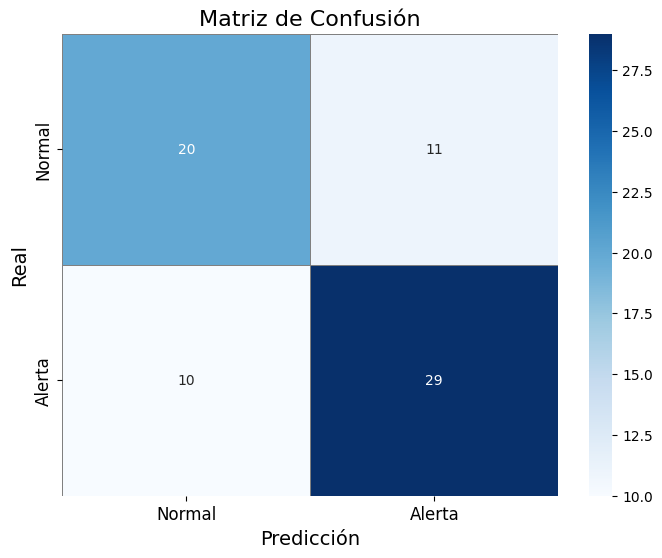

In [ ]:
# prueba 3
rf_3 = RandomForestClassifier(
    n_estimators=80,
    max_depth=8,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

rf_3.fit(X_train, y_train)
y_pred_rf_3 = rf_3.predict(X_test)

print("Random Forest — Modelo 3 (Regularizado)")
print(classification_report(y_test, y_pred_rf_3))
print(confusion_matrix(y_test, y_pred_rf_3))
plot_confusion_matrix(y_test, y_pred_rf_3, labels=["Normal", "Alerta"])


### interpretacion de la prueba 3: RandomForest regularizado
Este tercer modelo corresponde a una version regularizada del RandomForest, en el cual limitamos parametros como la profundidad de los arboles, el numero minimo de muestras por hoja  o por divicion, esto reduce de manera considerable la complejidad del modelo, lo cual en teoria ayudaria a a evitar el sobre ajuste, lo cual para nostros es valioso  ya que es pequeño nuestro dataset


Clase "Alerta"
- prescision: 0.72 o en palabras mas claras que pudo clasificar el 72% de los casos presentados
- recall: 0.74 ose que tiene un 74% de poder clasificar objetos de esta clase
- F1-score: 0.70 esto lo que nos indica es que 70% de buen manejo de esta clase

Clase "Normal"
- prescision: 0.67 o en palabras mas claras que pudo clasificar el 67% de los casos presentados
- recall: 0.65 ose que tiene un 65% de poder clasificar objetos de esta clase
- F1-score: 0.66 esto lo que nos indica es que 66% de buen manejo de esta clase

como vemos este modelo obtuvo un accuracy del 70% colocandose entre el rendimiento del modelo 1 y el modelo 2 de lo cual podemos decir es que arregla un poco el sobre ajuste del modelo 2, aun que no alacanza el rendimiento del modelo 1

Clase "Alerta"
- clasifico de manera correcta 29 intancias y clasfifico de manera erronea 10 instancias

Clase "Normal"
- clasifico de manera correcta 20 instancias y clasifico de manera erronea  11 instancias

para este caso la clase "Normal" se mantuvo casi igual que en el modelo 2

### vision general de los 3 modelos
al ver los resultado de las 3 pruebas para la clasificasion de las clase "Normal" y "Alerta", podemos decir que el modelo 1 fue quien obtubo mejor rendimiento global contra los otros modelos, con un recall y precision  ligeramente superiores  gracias a la complejidad moderada, que a diferancia el modelo 2 que era mas complejo por su profundidad, presento el peor rendimiento debido al sobreajuste lo que redujo su capacidad de generalizacion, finalmente el modelo 3 que estaba un poco mas regularizado en complejidad, evito un poco mas el sobreajuste del modelo 2 lo que lo llevo a a lograr un mejor rendimiento que el modelo 2 aun que no al nivel del modelo 1